In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import datetime

(1530403200.0, 1588289400.0)

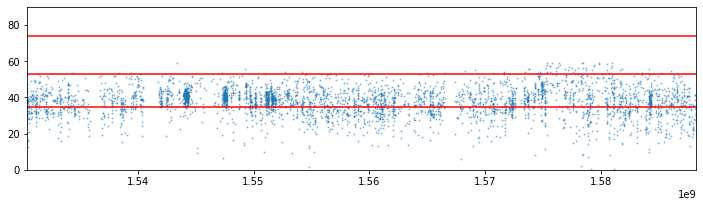

In [3]:
in_dir='../../L2/'
fp=h5py.File(in_dir+'WREF_L2.h5','r')
times=fp['TIME'][:]
zd2=fp['ZD2'][:]
zd=fp.attrs['zd']
towh=fp.attrs['tow_height']
canh=fp.attrs['canopy_height']
m=(zd2>0)&~(np.isnan(zd2))&(zd2<500)
plt.figure(figsize=(12,3))
plt.scatter(times,zd2,s=1,alpha=.4)
plt.plot([min(times),max(times)],[zd,zd],'r')
plt.plot([min(times),max(times)],[towh,towh],'r')
plt.plot([min(times),max(times)],[canh,canh],'r')
plt.ylim(0,90)
plt.xlim(np.min(times[m]),np.max(times[m]))

In [4]:
print(zd2[0])

-9999.0


In [5]:
fp.close()

In [6]:
fp2 = h5py.File('../../../../proj_monin/data/QAQCv4_neon_pntEB0.2_day_rain_frez_BA_BL_CA_H_H2_LA_SW_TC_TR_TS_T__US_VE_WS_ZL.h5','r')
fpsites=fp2['site'][:]
sites=[]
for site in fpsites:
    if site not in sites:
        sites.append(site)
print(sites)

[b'BART', b'SOAP', b'DELA', b'NIWO', b'MLBS', b'OSBS', b'WOOD', b'TREE', b'CLBJ', b'OAES', b'LENO', b'JERC', b'ORNL', b'TALL', b'BLAN', b'SERC', b'SRER', b'SJER', b'KONZ', b'TEAK', b'NOGP', b'RMNP', b'UNDE', b'DCFS', b'WREF', b'JORN', b'UKFS', b'STER', b'STEI', b'GRSM', b'YELL', b'HARV', b'MOAB', b'SCBI', b'ABBY', b'DSNY', b'CPER', b'ONAQ', b'KONA']


b'BART'
b'SOAP'
b'DELA'
b'NIWO'
b'MLBS'
b'OSBS'
b'WOOD'
b'TREE'
b'CLBJ'
b'OAES'
b'LENO'
b'JERC'
b'ORNL'
b'TALL'
b'BLAN'
b'SERC'
b'SRER'
b'SJER'
b'KONZ'
b'TEAK'
b'NOGP'
b'RMNP'
b'UNDE'
b'DCFS'
b'WREF'
b'JORN'
b'UKFS'
b'STER'
b'STEI'
b'GRSM'
b'YELL'
b'HARV'
b'MOAB'
b'SCBI'
b'ABBY'
b'DSNY'
b'CPER'
b'ONAQ'
b'KONA'
18


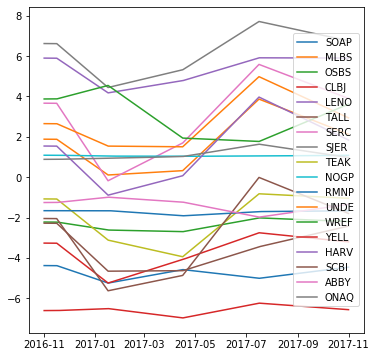

In [7]:
plt.figure(figsize=(6,6))
leg=[]
for site in sites:
    fp=h5py.File(in_dir+str(site)[2:-1]+'_L2.h5','r')
    zd=fp.attrs['zd']
    zd_s=fp['ZD_SEASONAL'][0:8760*2]
    print(site)
    zd3=fp['canopy_heights'].attrs['median_radius500']*.66
    time=fp['TIME'][0:8760*2]
    time2=[]
    for t in time:
        time2.append(datetime.datetime.utcfromtimestamp(t))
    zd_delta=zd_s-zd
    if np.abs(np.mean(zd_delta))<1:
        continue
    plt.plot(time2,zd_delta)
    leg.append(str(site)[2:-1])
    fp.close()
plt.legend(leg)
print(len(leg))
fp.close()

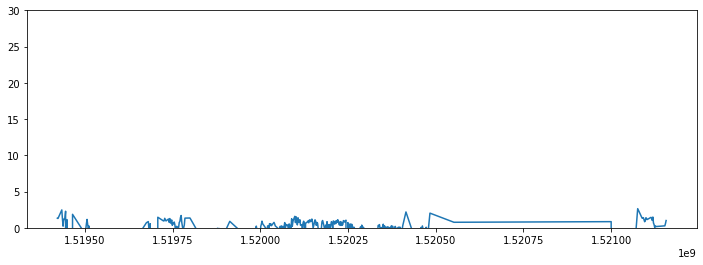

In [8]:
plt.figure(figsize=(12,4))
fp=h5py.File(in_dir+str(site)[2:-1]+'_L2.h5','r')
x=fp['TIME'][23000:24000]
y=fp['ZD2'][23000:24000]
zL=fp['ZL'][23000:24000]
m=np.abs(zL)<.1
plt.plot(x[m],y[m])
plt.ylim(0,30)
fp.close()

b'BART'
b'SOAP'
b'DELA'
b'NIWO'
b'MLBS'
b'OSBS'
b'WOOD'
b'TREE'
b'CLBJ'
b'OAES'
b'LENO'
b'JERC'
b'ORNL'
b'TALL'
b'BLAN'
b'SERC'
b'SRER'
b'SJER'
b'KONZ'
b'TEAK'
b'NOGP'
b'RMNP'
b'UNDE'
b'DCFS'
b'WREF'
b'JORN'
b'UKFS'
b'STER'
b'STEI'
b'GRSM'
b'YELL'
b'HARV'
b'MOAB'
b'SCBI'
b'ABBY'
b'DSNY'
b'CPER'
b'ONAQ'
b'KONA'


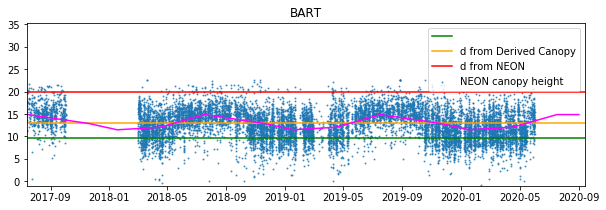

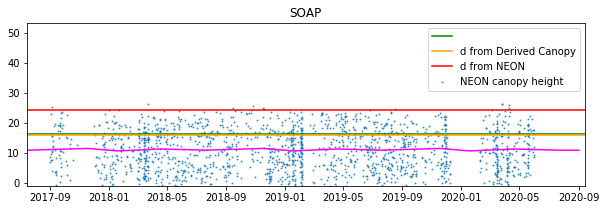

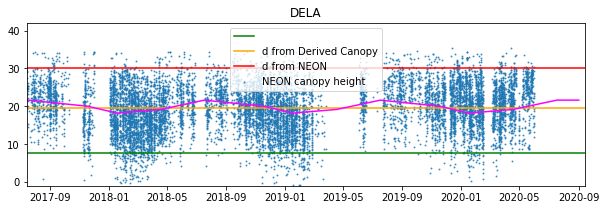

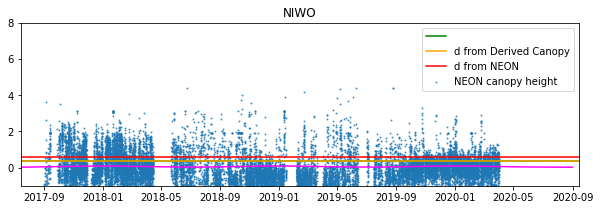

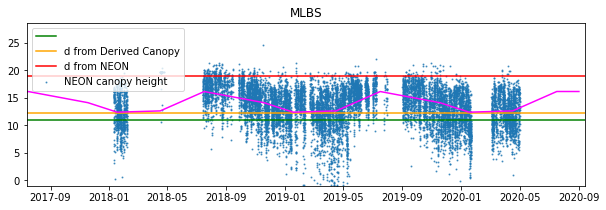

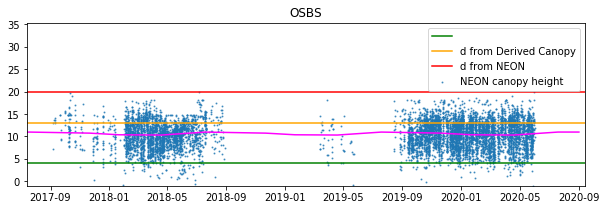

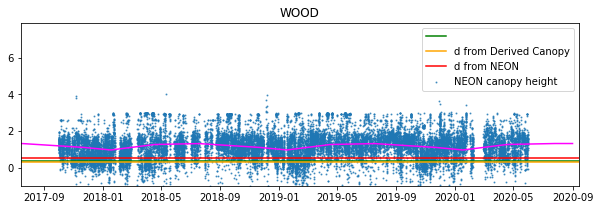

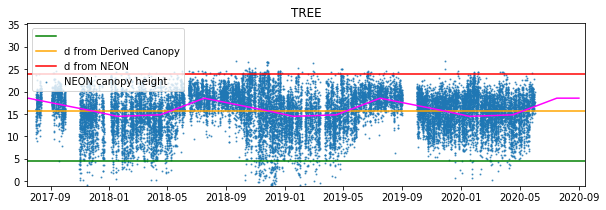

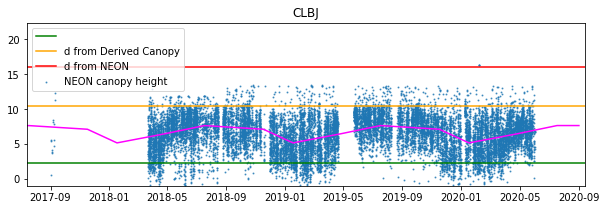

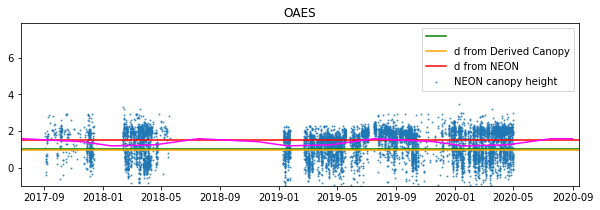

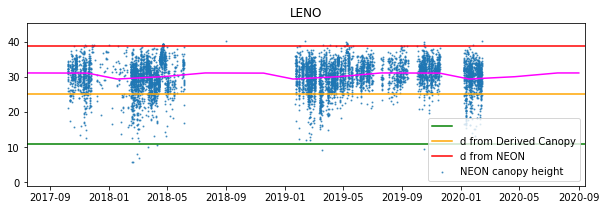

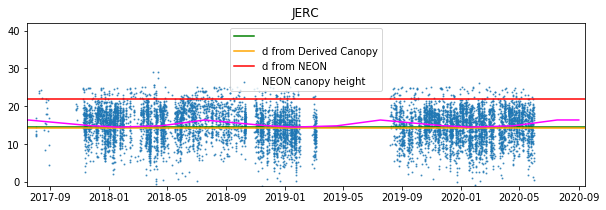

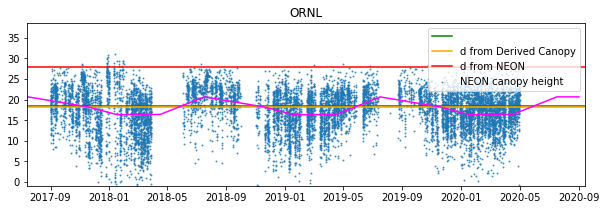

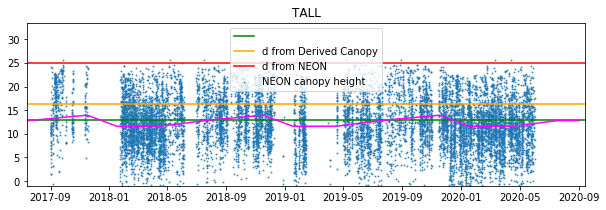

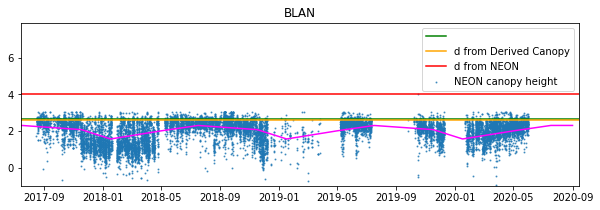

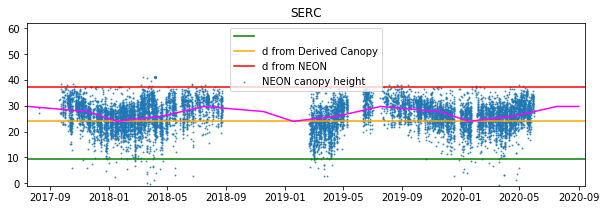

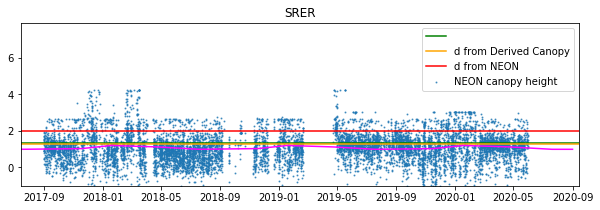

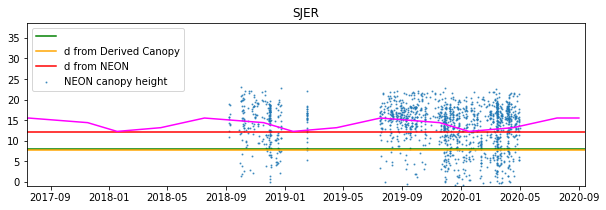

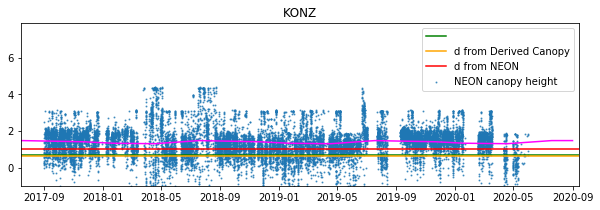

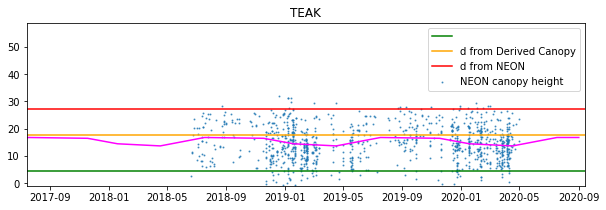

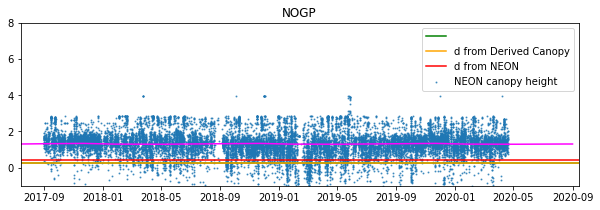

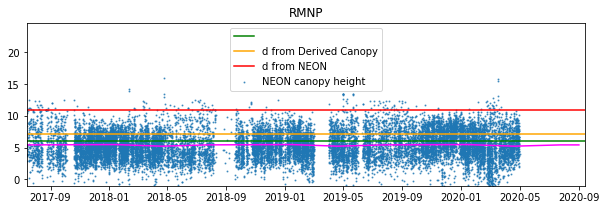

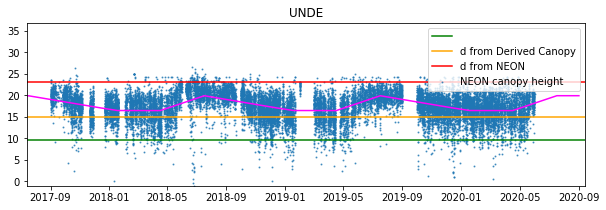

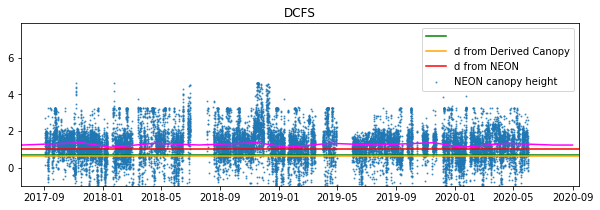

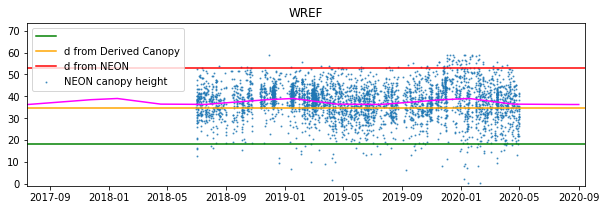

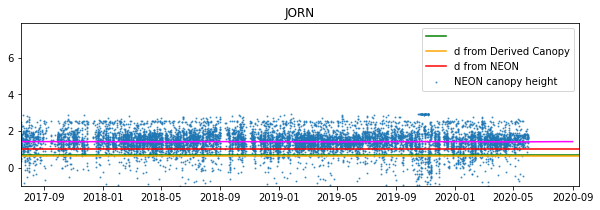

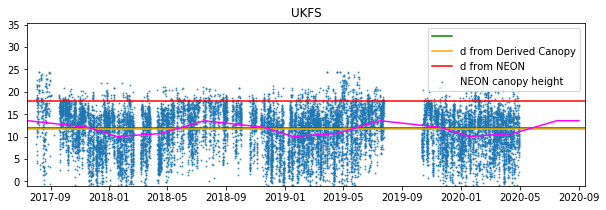

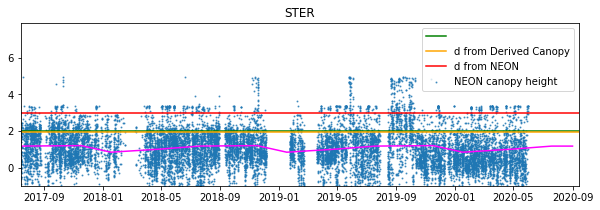

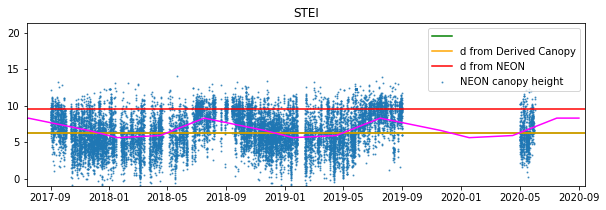

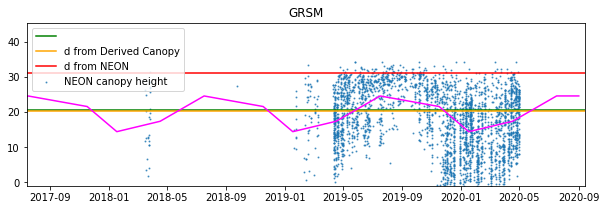

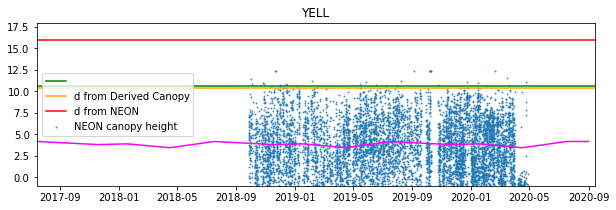

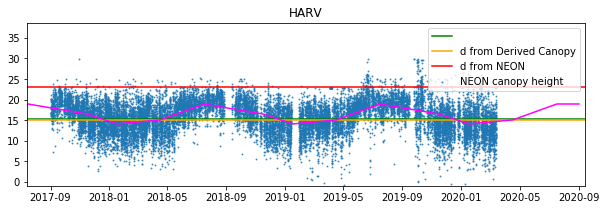

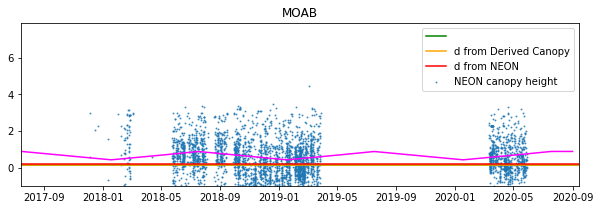

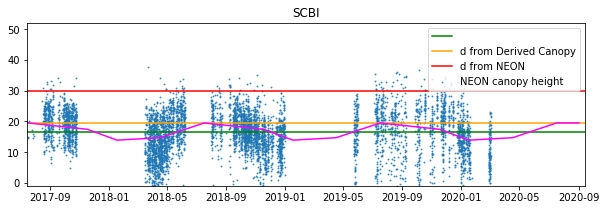

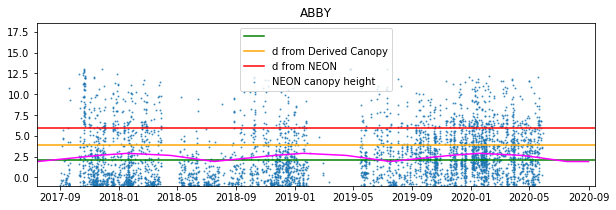

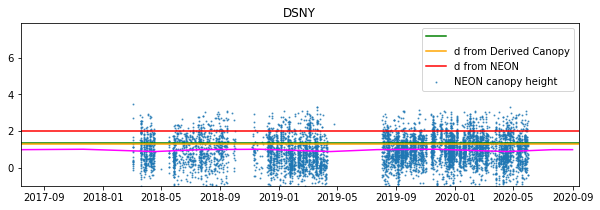

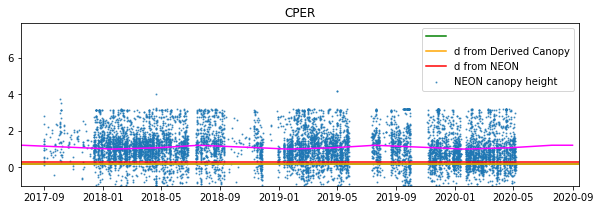

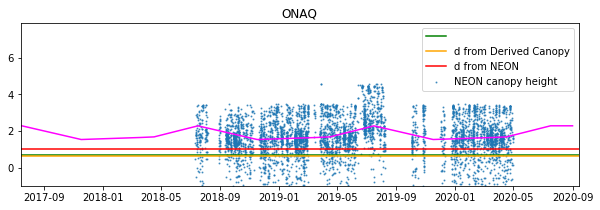

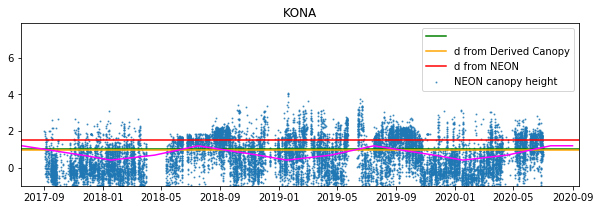

In [14]:
import warnings
warnings.filterwarnings('ignore')
#sites=[b'CLBJ',b'YELL',b'RMNP',b'JORN',b'SJER',b'SRER',b'JERC',b'KONZ',b'KONA',b'NOGP',b'DELA',b'JERC',b'TREE',b'UNDE',b'ORNL',b'DSNY',b'RMNP',b'UKFS',b'BART',b'TEAK', b'HARV', b'SOAP', b'ABBY', b'WREF']
#sites=[b'SOAP',b'YELL',b'RMNP',b'JERC',b'SCBI',b'GRSM',b'DELA',b'BART',b'ORNL',b'HARV']
fp=h5py.File(in_dir+str(site)[2:-1]+'_L2.h5','r')
time_all=fp['TIME'][:]
time_alldt=[]
for t in time_all:
    time_alldt.append(datetime.datetime.utcfromtimestamp(t))
time_alldt=np.array(time_alldt)
barx=[]
barval=[]
    
for site in sites:
    plt.figure(figsize=(10,3))
    
    m=fpsites==site
    times=fp2['TIME'][m]
    zd2=fp2['ZD2'][m]
    zd=fp2['zd'][m][0]
    canh=fp2['canopy_height'][m][0]
    
    
    
    fp=h5py.File(in_dir+str(site)[2:-1]+'_L2.h5','r')
    zL=fp['ZL'][:]
    towh=fp.attrs['tow_height']
    zd2=fp['ZD2'][:]
    zd=fp.attrs['zd']
    
    barval.append((np.mean(towh-fp['ZD_SEASONAL'][:])-(towh-zd))/(towh-zd))
    barx.append(site)
    try:
        zd3=fp['canopy_heights'].attrs['median_radius500']*.66
        print(site)
    except:
        zd3=zd
    canh=fp.attrs['canopy_height']
    times=time_alldt[:]
    
    plt.scatter(times,zd2,s=1,alpha=.7)
    xt2=datetime.datetime.utcfromtimestamp(1.6*10**9)
    xt=datetime.datetime.utcfromtimestamp(1.5*10**9)
    plt.plot([xt,xt2],[zd3,zd3],color='green')
    plt.plot([xt,xt2],[zd,zd],color='orange')
    plt.plot([xt,xt2],[canh,canh],color='red')
    plt.xlim(xt,xt2)
    
    plt.legend(['','d from Derived Canopy','d from NEON','NEON canopy height','zd from log profile'])
    
    bins=np.linspace(1.5*10**9,1.6*10**9,12*3+1)
    vals=[]
    xs=[]

    plt.plot(time_alldt,fp['ZD_SEASONAL'][:],color='magenta')
    
    ymin= -1
    ymax=towh
    plt.ylim(ymin,ymax)
    plt.title(str(site)[2:-1])
fp.close()

Text(0.5, 1.0, 'Percent Change in Z-zd')

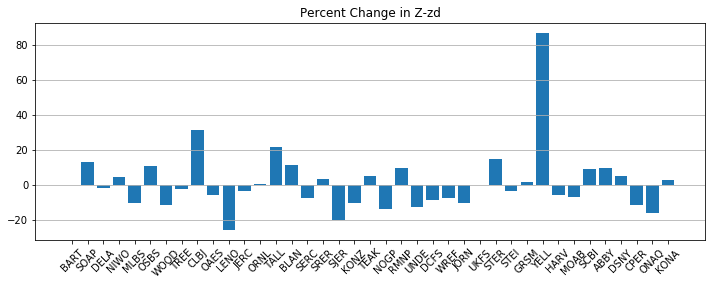

In [21]:
plt.figure(figsize=(12,4))
plt.bar(barx,np.array(barval)*100)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('Percent Change in Z-zd')

[-0.0023308320024845756, -0.3029910210051157, 0.01891137628907858, 0.1365322125430133, -0.1825463535674104, 0.03190395984180776, -0.3610701745789976, 0.20779122893889915, 0.0650579191182515, -0.008365924681452813, -0.23077830358108, 0.1194164609653983, 0.7858615851204757, -0.12464634604206852, -0.24336038647191047, 0.18714139194874704, 0.08395263404822627, -0.0011738102486275874, 0.07999079755171043, -0.019534873719983165, -0.6320596005804536, 0.09016294622373376, -0.15146662213765438, -0.361135180289497]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

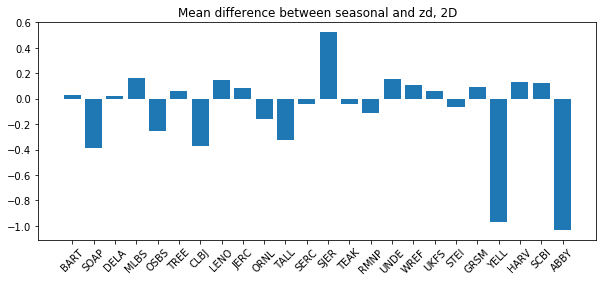

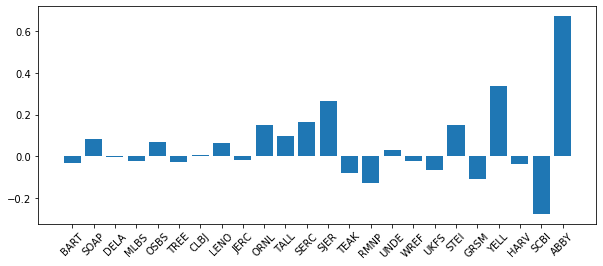

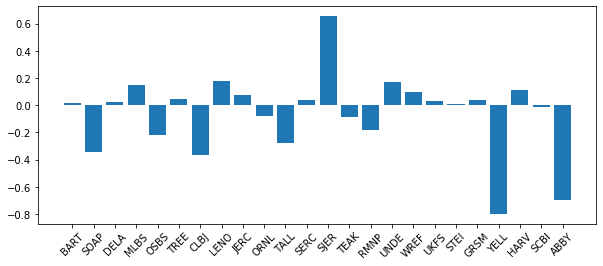

In [99]:
print(barval)

barval_2d=np.array([0.029766172352553282, -0.38438294744852364, 0.022125102391723293, 0.16161794860011014, -0.2530157012381235, 0.05974939105441967, -0.3689012323418312, 0.14616905087523058, 0.08162356676999853, -0.15687949418369185, -0.3261021951382516, -0.044732045109000924, 0.5227532939566383, -0.04190985360153461, -0.11488518448297468, 0.15520588904363194, 0.10564547787675224, 0.06418684410378311, -0.06816812319029304, 0.09058401953881703, -0.9686367641671724, 0.12836880722458593, 0.12621382292393932, -1.033223454417076])
plt.figure(figsize=(10,4))
plt.bar(barx,barval_2d)
plt.xticks(rotation=45)
plt.title('Mean difference between seasonal and zd, 2D')
deltabarval=barval-barval_2d
plt.figure(figsize=(10,4))
plt.bar(barx,deltabarval)
plt.xticks(rotation=45)
plt.figure(figsize=(10,4))
plt.bar(barx,(barval_2d+np.array(barval))/2)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

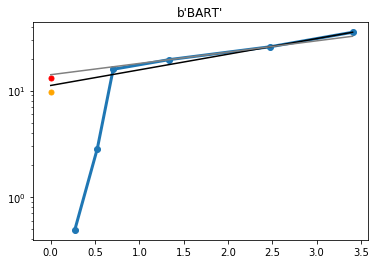

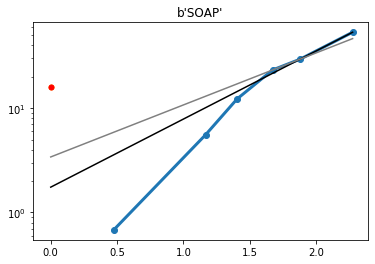

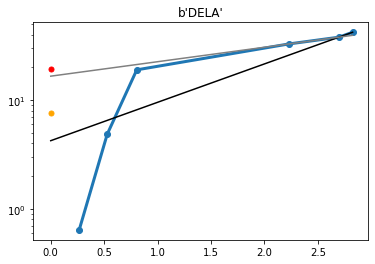

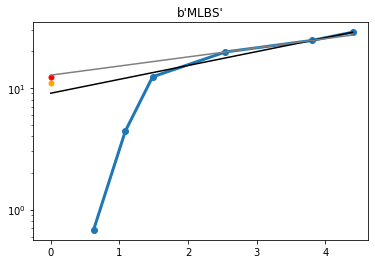

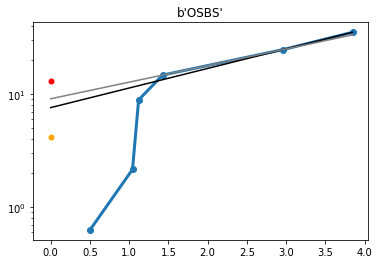

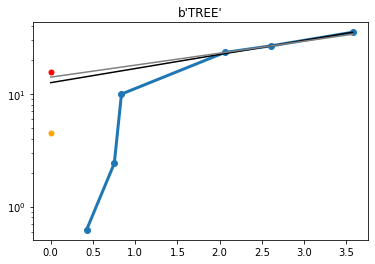

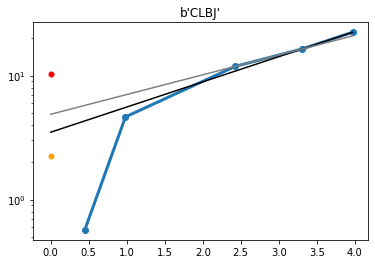

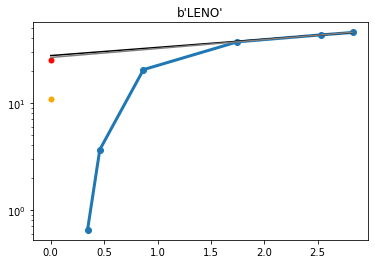

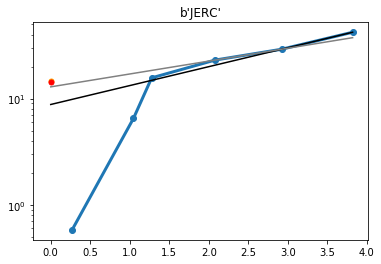

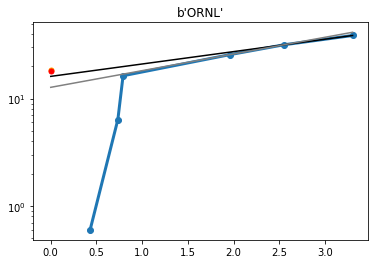

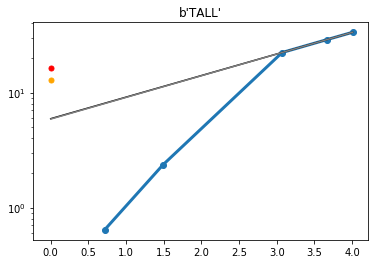

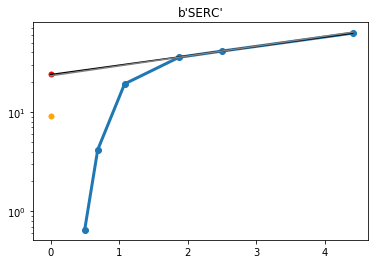

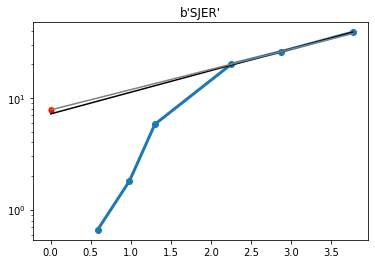

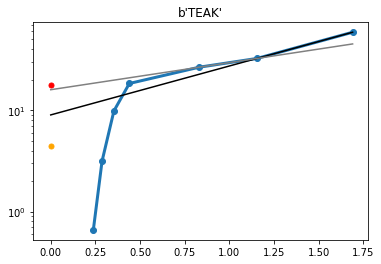

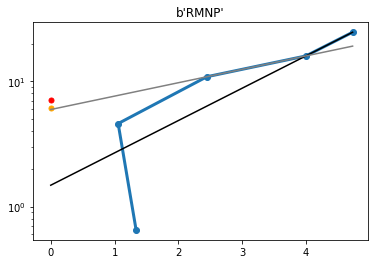

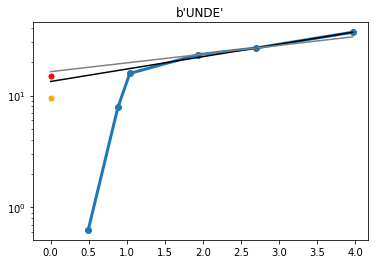

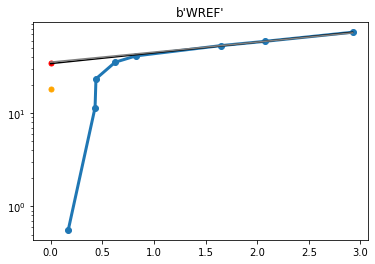

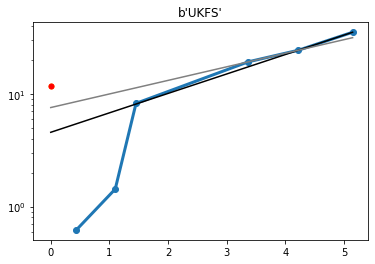

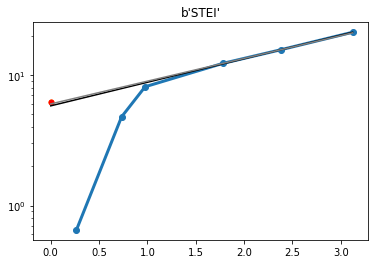

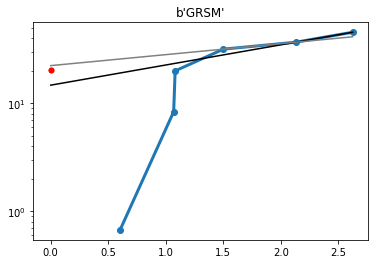

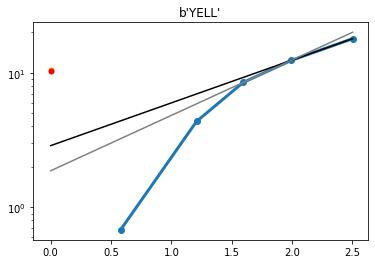

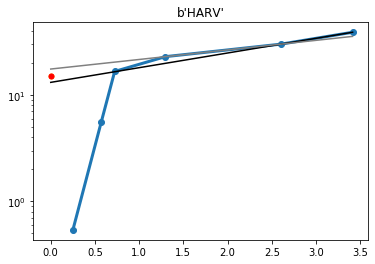

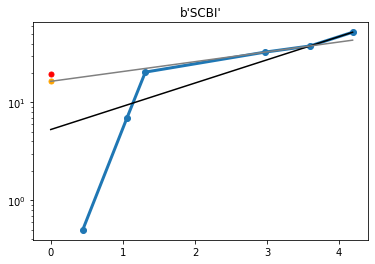

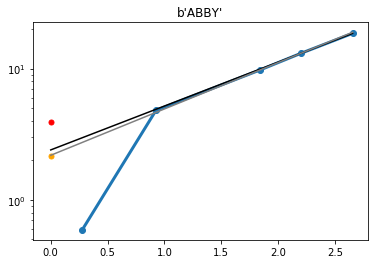

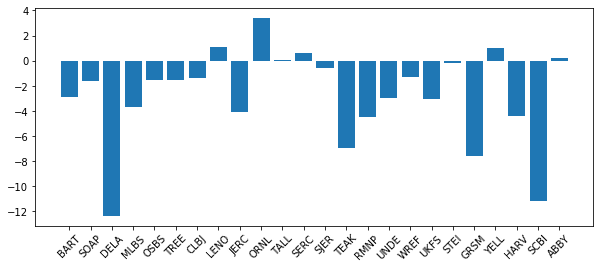

In [13]:
sites=[]
for site in fpsites:
    if site not in sites:
        sites.append(site)
deltas=[]
b1deltas=[]
b2deltas=[]
outsites=[]
for site in sites:
    fp=h5py.File(in_dir+str(site)[2:-1]+'_L2.h5','r')
    zL=fp['ZL'][:]
    towh=fp.attrs['tow_height']
    m=(np.abs(zL)<.1)
    m=m&(fp['WS'][:]>0)
    wind=[]
    windstd=[]
    height=[]
    heights=fp['vertical_wind'].attrs['heights']
    if len(heights)<=4:
        continue
    heights=heights[0:-1]
    for h in heights:
        ws=fp['vertical_wind/WIND_'+str(h)[2:-1]][:]
        m=m&(ws>0)
    for h in heights:
        ws=fp['vertical_wind/WIND_'+str(h)[2:-1]][:]
        windstd.append(np.std(ws[m]))
        wind.append(np.mean(ws[m]))
        height.append(float(str(h)[2:-1]))
    height.append(fp.attrs['tow_height'])
    wind.append(np.mean(fp['WS'][m]))
    windstd.append(np.std(fp['WS'][m]))
    windstd=np.array(windstd)
    wind=np.array(wind)
    plt.figure()
    #plt.errorbar(wind,height,xerr=windstd,fmt='o-')
    plt.plot(wind,height,'-o',linewidth=3)
    zd=fp.attrs['zd']
    zd3=fp['canopy_heights'].attrs['median_radius500']*.66
    sl1=(np.log10(height[-1])-np.log10(height[-2]))/(wind[-1]-wind[-2])
    sl2=(np.log10(height[-2])-np.log10(height[-3]))/(wind[-2]-wind[-3])
    b1=np.log10(height[-1])-wind[-1]*sl1
    b2=np.log10(height[-2])-wind[-2]*sl2
    delta=10**b1-10**b2
    deltas.append(delta)
    b1deltas.append(10**b1-zd)
    b2deltas.append(10**b2-zd)
    outsites.append(site)
    plt.scatter(0,zd3,color='orange',s=25)
    plt.scatter(0,zd,color='red',s=25)
    plt.plot([0,wind[-1]],[10**b1,10**(b1+sl1*wind[-1])],color='black')
    plt.plot([0,wind[-1]],[10**b2,10**(b2+sl2*wind[-1])],color='grey')
    plt.yscale('log')
    plt.title(site)
plt.figure(figsize=(10,4))
plt.bar(outsites,deltas)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

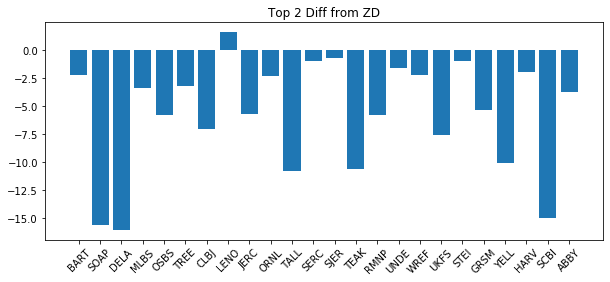

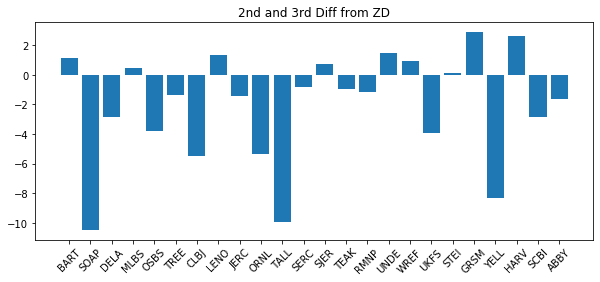

In [21]:
plt.figure(figsize=(10,4))
plt.bar(outsites,b1deltas)
plt.xticks(rotation=45)
plt.title('Top 2 Diff from ZD')

plt.figure(figsize=(10,4))
plt.title('2nd and 3rd Diff from ZD')
plt.bar(outsites,b2deltas)
plt.xticks(rotation=45)

In [44]:
fp.close()
fp2.close()